In [105]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [106]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [107]:
unit = pd.read_excel('unit.xlsx').drop('Unnamed: 0',axis=1)

In [108]:
unit.sort_values('values',ascending=True).head(3) # ТРИ ХУДШИХ ВАРИАНТА

,Сессия каждые N дней,Количество уровней в сессию,Показы рекламы принудительной каждые N уровней,Просмотр рекламы за ежедневную награду каждую N игровую сессию,Просмотр рекламы для возрождения и др. за сессию,Покупка бустеров каждую N сессию,Покупка декоративных элементов каждую N сессию,values
135,3,3,8,3,1,6,10,-52015
133,3,3,8,3,1,3,10,-42425
183,3,6,8,3,1,6,10,-39263


In [109]:
unit.sort_values('values',ascending=False).head(3) # ТРИ ЛУЧШИХ ВАРИАНТА

,Сессия каждые N дней,Количество уровней в сессию,Показы рекламы принудительной каждые N уровней,Просмотр рекламы за ежедневную награду каждую N игровую сессию,Просмотр рекламы для возрождения и др. за сессию,Покупка бустеров каждую N сессию,Покупка декоративных элементов каждую N сессию,values
56,1,6,4,1,5,3,5,4205074
58,1,6,4,1,5,6,5,3944524
68,1,6,4,3,5,3,5,3414153


In [110]:
unit.columns

Index(['Сессия каждые N дней', 'Количество уровней в сессию',
       'Показы рекламы принудительной каждые N уровней',
       'Просмотр рекламы за ежедневную награду каждую N игровую сессию',
       'Просмотр рекламы для возрождения и др. за сессию',
       'Покупка бустеров каждую N сессию',
       'Покупка декоративных элементов каждую N сессию', 'values'],
      dtype='object')

### 1. По коэффициентам логистической регрессии.

In [111]:
features = ['Сессия каждые N дней', 'Количество уровней в сессию',
       'Показы рекламы принудительной каждые N уровней',
       'Просмотр рекламы за ежедневную награду каждую N игровую сессию',
       'Просмотр рекламы для возрождения и др. за сессию',
       'Покупка бустеров каждую N сессию',
       'Покупка декоративных элементов каждую N сессию']

In [112]:
X, y = unit[features], unit['values']

In [113]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [17]:
model=LogisticRegression(max_iter=1000, random_state=1)

In [18]:
model.fit(X_scaled,y)

LogisticRegression(max_iter=1000, random_state=1)

In [19]:
feature_importance = pd.DataFrame({'Признак':list(X.columns),'Важность':[i for i in model.coef_[0]]})

In [20]:
model = LogisticRegression()
model.fit(X_scaled,y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=True)

,Attribute,Importance
4,Просмотр рекламы для возрождения и др. за сессию,-0.670485
1,Количество уровней в сессию,-0.550968
3,Просмотр рекламы за ежедневную награду каждую ...,0.519192
0,Сессия каждые N дней,0.520190
5,Покупка бустеров каждую N сессию,0.521875
6,Покупка декоративных элементов каждую N сессию,0.522889
2,Показы рекламы принудительной каждые N уровней,0.546109


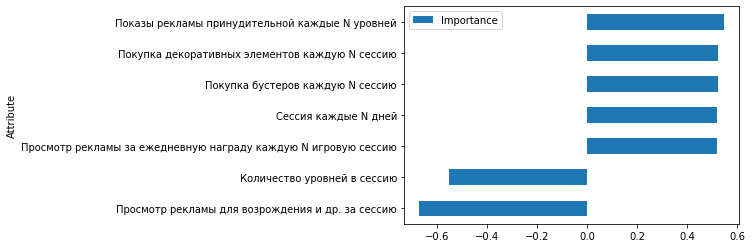

In [21]:
importances.plot(x = 'Attribute', y = 'Importance', kind = 'barh')
importances

### 2. Random Forest.

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model=RandomForestRegressor()

In [24]:
model.fit(X,y)

RandomForestRegressor()

In [25]:
feature_importances = pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
0,Сессия каждые N дней,0.457820
4,Просмотр рекламы для возрождения и др. за сессию,0.440514
6,Покупка декоративных элементов каждую N сессию,0.053026
3,Просмотр рекламы за ежедневную награду каждую ...,0.020135
2,Показы рекламы принудительной каждые N уровней,0.013021
1,Количество уровней в сессию,0.012091
5,Покупка бустеров каждую N сессию,0.003393


<AxesSubplot:ylabel='features'>

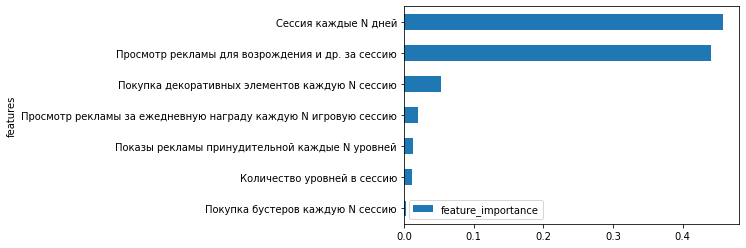

In [26]:
feature_importances.sort_values('feature_importance',ascending=True).plot(x = 'features', y = 'feature_importance', kind = 'barh')

### 3. XGBoost

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [28]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_scaled, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

<AxesSubplot:ylabel='Attribute'>

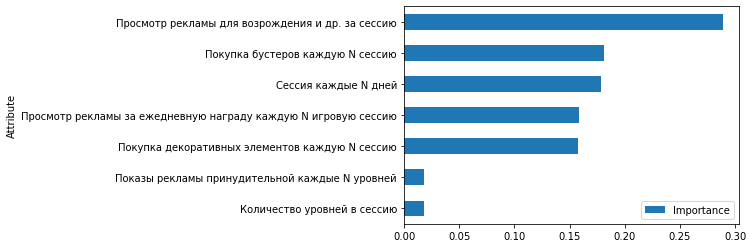

In [29]:
importances.sort_values('Importance',ascending=True).plot(x = 'Attribute', y = 'Importance', kind = 'barh')

### Коэффициенты корреляции по Пирсону и Спирману

In [30]:
unit[['Количество уровней в сессию','Просмотр рекламы для возрождения и др. за сессию', 'values']].corr().round(2)

,Количество уровней в сессию,Просмотр рекламы для возрождения и др. за сессию,values
Количество уровней в сессию,1.00,0.00,0.08
Просмотр рекламы для возрождения и др. за сессию,0.00,1.00,0.53
values,0.08,0.53,1.00


In [31]:
unit[['Количество уровней в сессию','Просмотр рекламы для возрождения и др. за сессию', 'values']].corr(method='spearman').round(2)

,Количество уровней в сессию,Просмотр рекламы для возрождения и др. за сессию,values
Количество уровней в сессию,1.00,0.0,0.08
Просмотр рекламы для возрождения и др. за сессию,0.00,1.0,0.50
values,0.08,0.5,1.00


### Тесты

In [32]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [41]:
# y = np.log(y)

In [125]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(7, activation='relu'),
    layers.Dense(7, activation='relu'),    
    layers.Dense(7, activation='relu'),
    layers.Dense(1),])

In [126]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [180]:
y = unit['values']

In [181]:
X = unit[features]

In [ ]:
# df_train = red_wine.sample(frac=0.7, random_state=0)
# df_valid = red_wine.drop(df_train.index)
# display(df_train.head(4))

# # Scale to [0, 1]
# max_ = df_train.max(axis=0)
# min_ = df_train.min(axis=0)
# df_train = (df_train - min_) / (max_ - min_)
# df_valid = (df_valid - min_) / (max_ - min_)

# # Split features and target
# X_train = df_train.drop('quality', axis=1)
# X_valid = df_valid.drop('quality', axis=1)
# y_train = df_train['quality']
# y_valid = df_valid['quality']

In [297]:
_train = unit.sample(frac=0.8, random_state=0)
_valid = unit.drop(_train.index)
# max_ = _train.max(axis=0)
# min_ = _train.min(axis=0)
# _train = (_train - min_) / (max_ - min_)
# _valid = (_valid - min_) / (max_ - min_)

In [298]:
X_train = _train.drop('values', axis=1)
X_valid = _valid.drop('values', axis=1)
y_train = _train['values']
y_valid = _valid['values']

In [299]:
y_train

110      73368
74      673665
163     113974
97        4749
126     250294
        ...   
150     338720
128     474113
34     2855113
28     1478665
114     217046
Name: values, Length: 154, dtype: int64

In [300]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Minimum validation loss: 137893.203125


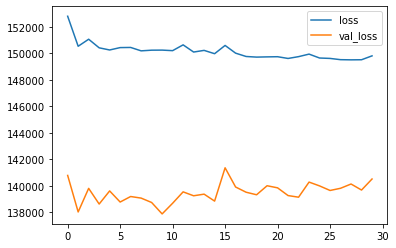

In [301]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=5,
    epochs=1000, 
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [306]:
X_test = pd.read_excel('X_test.xlsx')
X_test

,Сессия каждые N дней,Количество уровней в сессию,Показы рекламы принудительной каждые N уровней,Просмотр рекламы за ежедневную награду каждую N игровую сессию,Просмотр рекламы для возрождения и др. за сессию,Покупка бустеров каждую N сессию,Покупка декоративных элементов каждую N сессию
0,2,10,20,10,0,20,30
1,1,3,5,10,3,5,10


In [307]:
pred = model.predict(X_test)
pred

1/1 [==============================] - 0s 14ms/step


array([[576755.4 ],
       [424753.06]], dtype=float32)

In [308]:
pred

array([[576755.4 ],
       [424753.06]], dtype=float32)

In [309]:
X_test['preds'] = pred
X_test['preds'] = X_test.preds.apply(np.round)
X_test

,Сессия каждые N дней,Количество уровней в сессию,Показы рекламы принудительной каждые N уровней,Просмотр рекламы за ежедневную награду каждую N игровую сессию,Просмотр рекламы для возрождения и др. за сессию,Покупка бустеров каждую N сессию,Покупка декоративных элементов каждую N сессию,preds
0,2,10,20,10,0,20,30,576755.0
1,1,3,5,10,3,5,10,424753.0
